In [11]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [12]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Linear Discriminant Analysis Model


Model Evaluation with Correlation Threshold 0.1:
Accuracy: 0.6245294234198534
Recall: 0.6292478045055364
F1 Score: 0.6349450972837603
Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke']

Model Evaluation with Correlation Threshold 0.2:
Accuracy: 0.6620764810778681
Recall: 0.6164566628484154
F1 Score: 0.6543722768264262
Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'Sex', 'SleepTime', 'Asthma']

Model Evaluation with Correlation Threshold 0.3:
Accuracy: 0.7525262532197345
Recall: 0.7964872088583429
F1 Score: 0.7695997048515035
Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'Sex', 'AgeCategory', 'Diabetic', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

Model Evaluation with Correlation Threshold 0.4:
Accuracy: 0.7560927283534773
Recall: 0.7980145093547155
F1 Score: 0.7725004620218074
Selected Features: ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'Sex

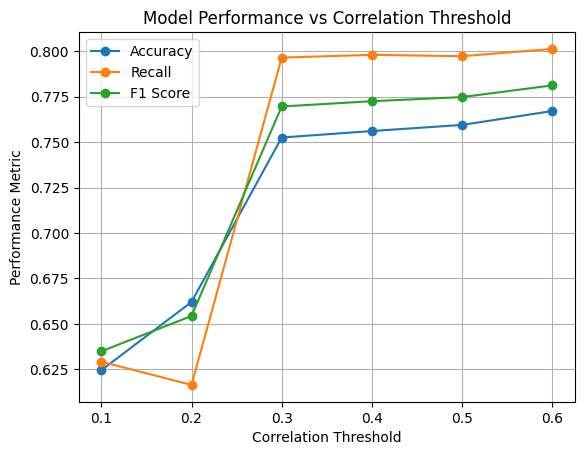

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Assuming you have already defined x and y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the range of correlation thresholds you want to try
correlation_thresholds_to_try = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Initialize lists to store results
accuracy_scores_corr = []
recall_scores_corr = []
f1_scores_corr = []
selected_features_list = []

# Try feature selection for different correlation thresholds
for threshold in correlation_thresholds_to_try:
    # Select features based on correlation
    correlated_features = set()
    correlation_matrix = x_train.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_features.add(colname)

    x_train_selected = x_train.drop(columns=correlated_features)
    x_test_selected = x_test.drop(columns=correlated_features)

    # Initialize the Linear Discriminant Analysis model
    lda_model = LinearDiscriminantAnalysis(solver='svd')

    # Fit the model on the selected training data
    lda_model.fit(x_train_selected, y_train)

    # Make predictions on the selected test data
    y_pred = lda_model.predict(x_test_selected)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append evaluation metrics to the lists
    accuracy_scores_corr.append(accuracy)
    recall_scores_corr.append(recall)
    f1_scores_corr.append(f1)

    # Append selected features to the list
    selected_features_list.append(x_train_selected.columns.tolist())

    # Print the evaluation metrics
    print(f"\nModel Evaluation with Correlation Threshold {threshold}:")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Selected Features:", x_train_selected.columns.tolist())

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Corr Threshold': correlation_thresholds_to_try,
    'Accuracy': accuracy_scores_corr,
    'Recall': recall_scores_corr,
    'F1 Score': f1_scores_corr,
    'Selected Features': selected_features_list,
})


# Plot the results
plt.plot(correlation_thresholds_to_try, accuracy_scores_corr, marker='o', label='Accuracy')
plt.plot(correlation_thresholds_to_try, recall_scores_corr, marker='o', label='Recall')
plt.plot(correlation_thresholds_to_try, f1_scores_corr, marker='o', label='F1 Score')

plt.title('Model Performance vs Correlation Threshold')
plt.xlabel('Correlation Threshold')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()
